# Recap on Section 1: Business Understanding

This project targets home owners who are considering renting out their home on AirBnB or home owners who already do so and want to maximize the return they get from their rentals. This project looks at three questions:

1. Which listing attributes have the highest impact on the listing's price?
2. How do the prices of superhost's listings differ from the prices of regular host's listings?
3. How well can we predict a listing's price?

## What you can expect to find within this Jupyter Notebook
This Jupyter Notebook is the second of two Jupyter Notebooks created with the objective to retrieve meaningful insights from the AirBnb datasets of Berlin and Boston. The first Jupyter Notebook focussed on data preparations and can be found in this directory named AirBnBPreparations. We will start this second Jupyter Notebook at the point where the first one finished. Our first step will thus be to read in two dataframes (my_berlin and my_boston) that were cleaned in the first Jupyter Notebook. 
This Jupyter Notebook will focus on three questions:
1. Which listing attributes have the highest impact on the listing's price?
2. How do the prices of superhost's listings differ from the prices of regular host's listings?
3. How well can we predict a listing's price?

## Reading in required libraries and configuring global settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

## Reading in the prepared datasets for AirBnB listings in Berlin and Boston

In [2]:
my_berlin = pd.read_csv('./my_berlin_after_data_preparation.csv')
my_berlin.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
my_boston = pd.read_csv('./my_boston_after_data_preparation.csv')
my_boston.drop(columns = 'Unnamed: 0', inplace = True)

# Section 5: Evaluate

## Question 1: Which listing attributes have the highest impact on the listing's price?

In [4]:
corr = round(100 * pd.concat([my_berlin, my_boston], sort = False).corr()['price'].sort_values(ascending=False), 2)

price_corr = pd.DataFrame({'Features': corr.index, 'Correlation': corr}, index=None)
price_corr.drop(labels = 'price', inplace = True)
price_corr['Absolute Correlation'] = abs(price_corr['Correlation'])
price_corr.sort_values('Absolute Correlation', ascending=False).head(n=10)

,Features,Correlation,Absolute Correlation
accommodates,accommodates,17.89,17.89
property_type_Other,property_type_Other,15.00,15.00
bedrooms,bedrooms,14.73,14.73
cancellation_policy_strict,cancellation_policy_strict,12.56,12.56
beds,beds,12.08,12.08
guests_included,guests_included,11.77,11.77
room_type_Entire home/apt,room_type_Entire home/apt,11.62,11.62
room_type_Private room,room_type_Private room,-11.33,11.33
property_type_Apartment,property_type_Apartment,-11.29,11.29
bathrooms,bathrooms,10.82,10.82


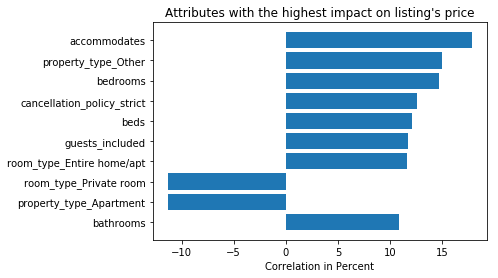

In [5]:
fig, ax = plt.subplots()

features = price_corr.sort_values('Absolute Correlation', ascending=False).head(n=10)['Features']
corr = price_corr.sort_values('Absolute Correlation', ascending=False).head(n=10)['Correlation']
position = [0,1,2,3,4,5,6,7,8,9]

ax.barh(position, corr, align='center')
ax.set_yticks(position)
ax.set_yticklabels(features)
ax.invert_yaxis()
ax.set_xlabel('Correlation in Percent')
ax.set_title('Attributes with the highest impact on listing\'s price')

plt.show()

## Our Findings for Question 1
- From the above correlation results, we see that the price of a listing is most impacted by the number of guests a listing accomodates (correlation coefficient: 17.89). The more guests the listing accomodates, the higher its price. Other characteristics of the listing have positive impacts on the price as well: the more bedrooms a listing has, the higher its price (correlation coefficient: 14.73); the more beds a listing has, the higher its price (correlation coefficient: 12.08), the more guests are included within the booking, the higher the price (correlation coefficient: 11.77), and the more bathrooms a listing has, the higher its price (correlation coefficient: 10.82). From this input we derive: the characteristics of a listing are an essential factor when finding a price for a listing.
- The second highest correlation for a listing's price is the feature property_type_Other (correlation coefficient: 15). "Other" property types - as we saw during our data cleaning - includes e.g. boats and house boats, villas, resorts, castles, chalets, and islands. Well, we can see why those would be a little more expensive that a regular apartment: their scarcity drives the traveler's demand, and the high demand results in a high price. In alignment with this finding, we can additionally see that the property_type_Apartment is negatively correlated to the price (correlation coefficient: -11.29). Renting out "just any plain old apartment" is not a price booster.
- Another high positive impact on the price has a strict cancellation policy (correlation coefficient: 12.56). Having a strict cancellation policy leads to higher prices as opposed to super-strict cancellation policies or flexible / moderate cancellation policies. Please note for this finding: the Berlin dataset did not have any listings with strict cancellation policies. Since listing prices in Boston are overall higher than those in Berlin, the high correlation might stem from the difference in locations rather than the traveler's preference for one or the other cancellation policy. 
- Last but not least: room type. From the correlations we see it becomes clear: renting out an entire home or apartment impacts the price positively (correlation coefficient: 11.62) while renting out a private room has a negative impact on the price (correlation coefficient: -11.29). 

## Question 2: How do the prices of superhost's listings differ from the prices of regular host's listings?

Splitting the datasets into superhost listings and regular host listings

In [6]:
berlin_superhosts = my_berlin[my_berlin['host_is_superhost'] == True]
berlin_regular_hosts = my_berlin[~my_berlin['host_is_superhost'] == True]
boston_superhosts = my_boston[my_boston['host_is_superhost'] == True]
boston_regular_hosts = my_boston[~my_boston['host_is_superhost'] == True]

In [7]:
print('Superhost mean price in Berlin', berlin_superhosts['price'].mean())
print('Regular host mean price in Berlin', berlin_regular_hosts['price'].mean())

Superhost mean price in Berlin 70.90235802059117
Regular host mean price in Berlin 66.56450539890487


In [8]:
print('Superhost mean price in Boston', boston_superhosts['price'].mean())
print('Regular host mean price in Boston', boston_regular_hosts['price'].mean())

Superhost mean price in Boston 176.43488943488944
Regular host mean price in Boston 173.60446821900567


By checking the mean price of listings, we see that in Berlin and Boston alike, superhost listings achieve on average higher prices than regular host listings. We want to dig deeper:

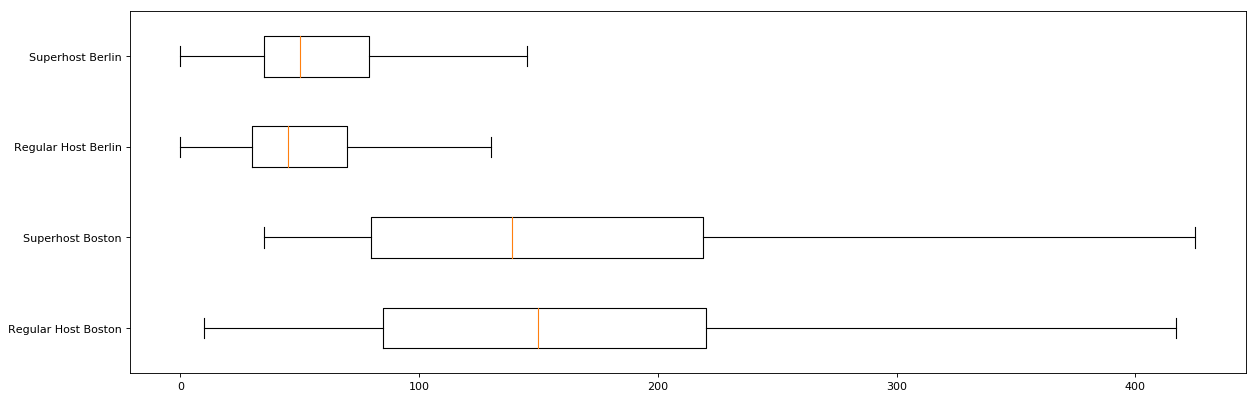

In [9]:
plt.figure(figsize=(18, 6), dpi=80)

bplot = plt.boxplot(x=[boston_regular_hosts['price'], boston_superhosts['price'],
               berlin_regular_hosts['price'], berlin_superhosts['price']], 
            labels=['Regular Host Boston', 'Superhost Boston', 'Regular Host Berlin', 'Superhost Berlin'], 
            vert = False, showfliers = False);

In [10]:
print('Berlin Superhost statistics\n', berlin_superhosts['price'].describe())
print('\nBerlin Regular host statistics\n', berlin_regular_hosts['price'].describe())

Berlin Superhost statistics
 count    3011.000000
mean       70.902358
std       106.989796
min         0.000000
25%        35.000000
50%        50.000000
75%        79.000000
max      2500.000000
Name: price, dtype: float64

Berlin Regular host statistics
 count    19541.000000
mean        66.564505
std        232.868218
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64


In [11]:
print('Boston Superhost statistics\n', boston_superhosts['price'].describe())
print('\nBoston Regular host statistics\n', boston_regular_hosts['price'].describe())

Boston Superhost statistics
 count     407.000000
mean      176.434889
std       140.433355
min        35.000000
25%        80.000000
50%       139.000000
75%       219.000000
max      1300.000000
Name: price, dtype: float64

Boston Regular host statistics
 count    3178.000000
mean      173.604468
std       149.330671
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


## Our Findings for Question 2
- In Berlin, superhost listings achieve higher average prices than regular host listings. Additionally, the boxplot and the corresponding statistics show that minimum value, 25 percentile, 50 percentile, and 75 percentile are all higher for superhost listings than for regular host listings. Surprisingly, the maximum value is higher for regular host listings than for the superhost listings. Since this maximum value contradicts the other findings for the Berlin dataset, it might be considered an outlier.
- The Boston dataset poses a bigger surprise: checking the mean values first, we saw that the prices of superhost listings are on average higher than the prices of listings of regular hosts. But digging deeper, we find that 25 percentile, 50 percentile, 75 percentile, and the maximum value of the regular host listings are actually higher than those of the superhost listings. Apart from the mean value, only the minimum value remains which has a higher value for superhost listings as compared to regular host listings.
- To put it in a nutshell, in Berlin hosts with status superhost can achieve higher prices for their listings. In Boston on the other hand, it is not necessarily price-wise worth the effort to receive and retain the status 'superhost'.

# Section 4: Modeling and Section 5: Evaluate

## Question 3: How well can we predict a listing's price?

In [12]:
lm_berlin = LinearRegression(normalize = True)
X_berlin = my_berlin.drop(columns='price')
y_berlin = my_berlin['price']

r2_scores_berlin = [0] * 100
discard = 0

for i in np.arange(100):
    X_train_berlin, X_test_berlin, y_train_berlin, y_test_berlin = train_test_split(
        X_berlin, y_berlin, test_size = 0.3, random_state = i)
    lm_berlin.fit(X_train_berlin, y_train_berlin)
    y_pred_berlin = lm_berlin.predict(X_test_berlin)
    r2_score_berlin = r2_score(y_test_berlin, y_pred_berlin)
    if (r2_score_berlin >= 0) and (r2_score_berlin <= 1):
        r2_scores_berlin[i] = r2_score_berlin
    else:
        discard = discard + 1
    
print('After 100 iterations the r squared\'s mean in Berlin is:', round(100 * np.sum(r2_scores_berlin)/(99-discard),2), '%.')

After 100 iterations the r squared's mean in Berlin is: 5.35 %.


In [13]:
lm_boston = LinearRegression(normalize = True)
X_boston = my_boston.drop(columns='price')
y_boston = my_boston['price']

r2_scores_boston = [0] * 100
discard = 0

for i in np.arange(100):
    X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(
        X_boston, y_boston, test_size = 0.3, random_state = i)
    lm_boston.fit(X_train_boston, y_train_boston)
    y_pred_boston = lm_boston.predict(X_test_boston)
    r2_score_boston = r2_score(y_test_boston, y_pred_boston)
    if (r2_score_boston >= 0) and (r2_score_boston <= 1):
        r2_scores_boston[i] = r2_score_boston
    else:
        discard = discard + 1
    
print('After 100 iterations the r squared\'s mean in Boston is:', round(100 * np.sum(r2_scores_boston)/(99-discard),2), '%.')

After 100 iterations the r squared's mean in Boston is: 33.86 %.


In [14]:
# Removing wrongfuls iterations
def remove_discarded_iterations (r2_scores):
    """
    Takes the input, removes any list elements with value 0, and multiplies all list elements with 100.
    
    Parameters:
    r2_scores(list of floats): contains the r2 scores of the 100 iterations on predicting the dependent variable y 
    
    Returns:
    cleaned_r2_score (list of floats): contains the r2 scores as inputted, multiplied by 100. 
                                        List entries with value 0 are removed. 
                                        The length of the returned list may be smaller than of the input list.
    
    """
    cleaned_r2_score = [100 * value for value in r2_scores if value != 0]
    return cleaned_r2_score

# Berlin
cleaned_r2_scores_berlin = remove_discarded_iterations(r2_scores_berlin)
mean_berlin = np.mean(cleaned_r2_scores_berlin)
# Boston
cleaned_r2_scores_boston = remove_discarded_iterations(r2_scores_boston)
mean_boston = np.mean(cleaned_r2_scores_boston)

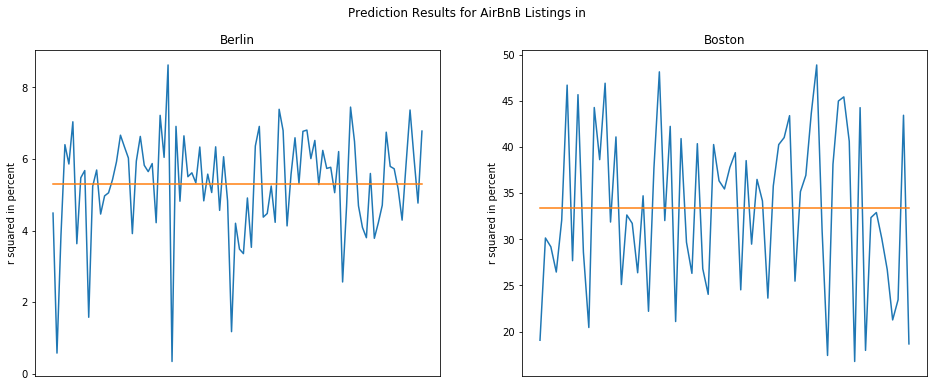

In [15]:
# Drawing line chart of prediction results for later usage in blog post
fig, (ax1, ax2) = plt.subplots(1 , 2, figsize = [16, 6])
fig.suptitle('Prediction Results for AirBnB Listings in')

ax1.plot(np.arange(len(cleaned_r2_scores_berlin)), cleaned_r2_scores_berlin)
ax1.plot(np.arange(len(cleaned_r2_scores_berlin)), [mean_berlin] * len(cleaned_r2_scores_berlin))
ax1.set_title('Berlin')
ax1.set_ylabel('r squared in percent')
ax1.tick_params(axis='x', bottom=False, labelbottom=False)

ax2.plot(np.arange(len(cleaned_r2_scores_boston)), cleaned_r2_scores_boston)
ax2.plot(np.arange(len(cleaned_r2_scores_boston)), [mean_boston] * len(cleaned_r2_scores_boston))
ax2.set_title('Boston')
ax2.set_ylabel('r squared in percent')
ax2.tick_params(axis='x', bottom=False, labelbottom=False)

plt.show()

## Our Findings for Question 3
From the above predictions, we can see that the Berlin prices are less predictable than the Boston prices. After fitting 100 linear models, our r squared shows us that on average ~ 5 % of our Berlin data fit our Berlin model(s) and on average ~ 34 % of our Boston data fit our Boston model(s).

## Ideas for Improvements on Question 3
The above stated r squared error rates leave some room for improvement in predicting a listing's price. Ideas to further advance the prediction quality include:
- Check more cities with AirBnB offerings to enhance our overall business understanding of the AirBnB business model and our data unterstanding of the AirBnB listings and their features. One example might be the Seattle AirBnB dataset on Kaggle (https://www.kaggle.com/airbnb/seattle/data)
- Go back to the data preparation and include more columns. Remember, in the beginning we excluded all text-field columns - maybe those can increase the quality of our predictions.
- Find more advanced algorithms for modelling the data and making predictions. Linear Regression is always a good starting point but maybe other algorithms, e.g. Support Vector Regression or Neural Networks, will yield better results.
- Add more measures to evaluate the predictions more holistically. Currently, the r squared error is our only measure of success or failure. Possible measures might include mean squared error or mean absolute error.

All in all, you see that further improvements can be made at each step of our CRISP-DM approach.

# What remains to say

If you are interested to find out more about the data preparations made for this AirBnB listings analysis, please feel free to check out the first Jupyter Notebook of this series named AirBnBDataPreparation.

The datasets used within this Jupyter Notebook can be found on Kaggle (https://www.kaggle.com/brittabettendorf/berlin-airbnb-data for the Berlin dataset and https://www.kaggle.com/airbnb/boston for the Boston dataset).

Author: F B

This project has been created as part of the Udacity Nanodegree "Data Scientist" 's first project "Write a Data Science Blog Post".

Created in November 2021